# ADA Final exam 2017

In [186]:
''' Package import test '''
import os
import gzip
import random
import pickle
import re
import itertools
import collections
import operator
import requests
from urllib.parse import *
from datetime import *
from dateutil.parser import parse

import math
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import *

import ast
import gensim
import string
import nltk
import codecs
import json
import vaderSentiment
import spacy
from empath import Empath
from bs4 import BeautifulSoup

import networkx as nx

from IPython.display import Image
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter('ignore')

print("Package import test successful!")

UsageError: Line magic function `%` not found.


## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.


In [187]:
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

In [188]:
pokemon.set_index("pid")
pokemon.index.is_unique

True

In [189]:
dfs = [("pokemon", pokemon), ("combats", combats)]
for name, df in dfs:
    print(f"DF: {name}")
    print(df.dtypes)
    print()

DF: pokemon
pid           int64
Name         object
Class 1      object
Class 2      object
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Legendary      bool
dtype: object

DF: combats
First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object



In [190]:
for name, df in dfs:
    print(f"DF: {name}")
    print(f"NA values: {df.isna().sum().sum()}")
    print(f"NA values per column: {df.isna().sum()}")
    print()

print(pokemon[pokemon.Name.isna()])
pokemon = pokemon[~pokemon.Name.isna()]

DF: pokemon
NA values: 387
NA values per column: pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

DF: combats
NA values: 0
NA values per column: First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

    pid Name   Class 1 Class 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62   63  NaN  Fighting     NaN  65     105       60       60       70     95   

    Legendary  
62      False  


In [191]:
for name, df in dfs:
    print(f"DF: {name}")
    print(df.describe())
    print()


DF: pokemon
            pid          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  
count  800.000000  
mean    68.277500  
std     29.060474  
min      5.000000  
25%     45.000000  
50%     65.000000  
75%     90.000000  
max    180.000000  

DF: combats
       First_pokemon  Second_pokemon        Winner
count   50000.000000    50000.00

In [192]:
print(pokemon.describe(include="object"))
print()
print(pokemon[["Class 1"]].value_counts())
print()
print(pokemon[["Class 2"]].value_counts())


           Name Class 1 Class 2
count       799     799     414
unique      799      18      18
top     Yanmega   Water  Flying
freq          1     112      97

Class 1 
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
dtype: int64

Class 2 
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
dtype: int64


<Figure size 1200x900 with 0 Axes>

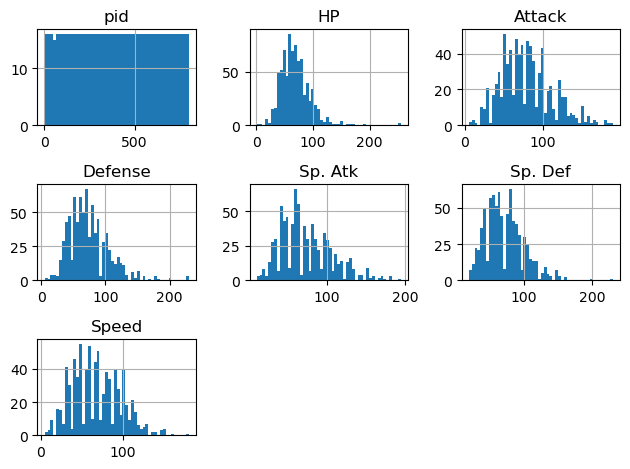

In [193]:
plt.figure(dpi=150, figsize=(8, 6))
pokemon.hist(bins=50)
plt.tight_layout()
plt.show()

2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.


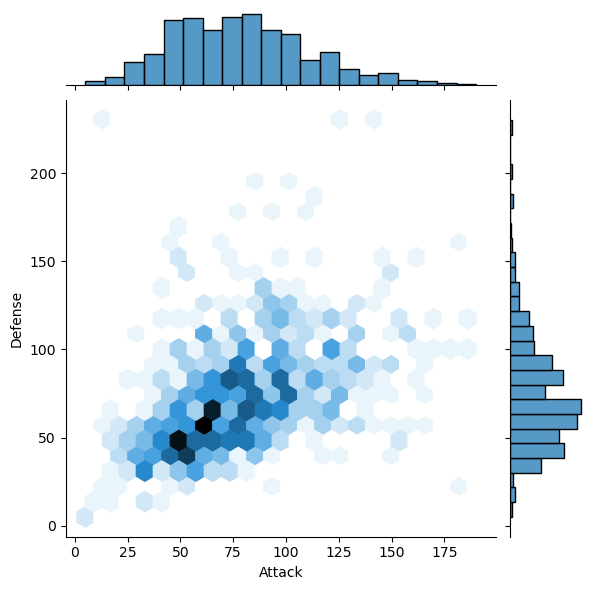

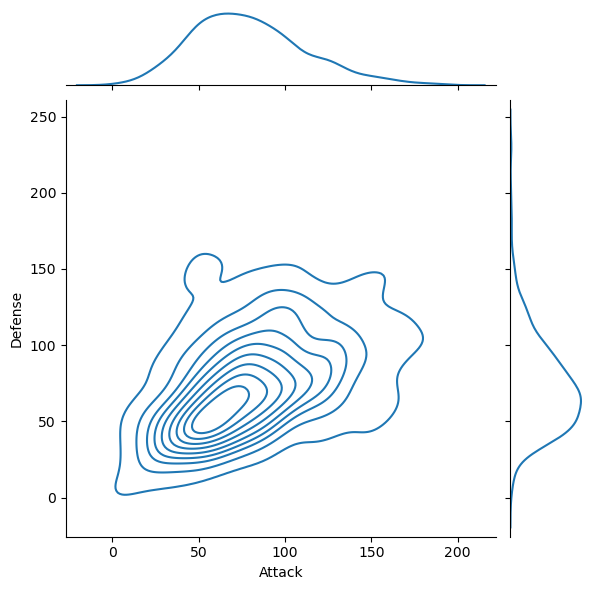

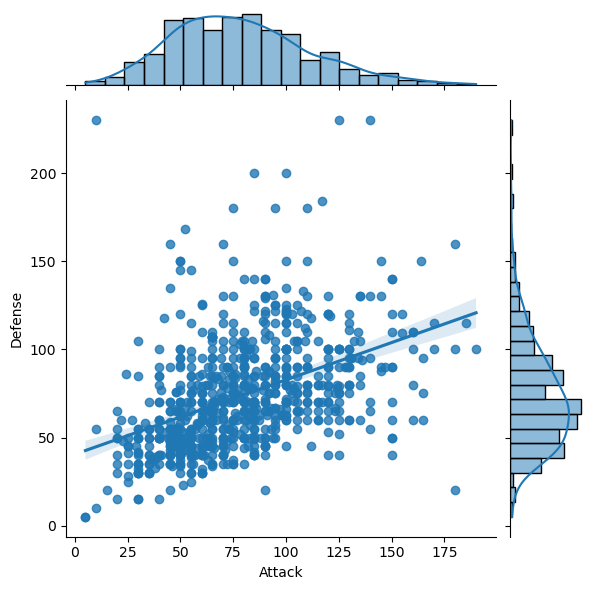

In [194]:
# 2.1.
for i, kind in enumerate(["hex", "kde", "reg"]):
    sns.jointplot(x="Attack", y="Defense", data=pokemon, kind=kind)
    plt.show()

In [195]:
# 2.2.
pokemon["attack_over_defense"] = pokemon.Attack / pokemon.Defense

print("Highest attack-over-defense ratio:")
pokemon.sort_values("attack_over_defense", ascending=False).head(5)

Highest attack-over-defense ratio:


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.000
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.500
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.750
453,454,Cranidos,Rock,NaN,67,125,40,30,30,58,False,3.125
348,349,Sharpedo,Water,Dark,70,120,40,95,40,95,False,3.000


In [196]:
# 2.3.
print("Lowest attack-over-defense ratio:")
pokemon.sort_values("attack_over_defense", ascending=True).head(5)

Lowest attack-over-defense ratio:


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,0.281250
616,617,Darmanitan Zen Mode,Fire,Psychic,105,30,105,140,105,55,False,0.285714


In [197]:
# 2.4.
pokemon["victories"] = pokemon.merge(combats, left_index=True, right_on="Winner").groupby("pid")["Name"].count()
pokemon["victories"] = pokemon["victories"].fillna(0)
pokemon[["Name", "victories"]].head()

,Name,victories
0,Bulbasaur,0.0
1,Ivysaur,0.0
2,Venusaur,37.0
3,Mega Venusaur,46.0
4,Charmander,89.0


In [198]:
print("Top 10 wrt victories:")
pokemon.sort_values("victories", ascending=False)[["Name", "victories"]].head(10)

Top 10 wrt victories:


,Name,victories
164,Mega Mewtwo Y,152.0
439,Prinplup,136.0
155,Snorlax,136.0
429,DeoxysAttack Forme,134.0
433,Grotle,133.0
315,Ninjask,133.0
395,Snorunt,130.0
215,Misdreavus,130.0
250,Phanpy,128.0
428,Deoxys Normal Forme,127.0



3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [199]:
c1 = "Grass"
c2 = "Rock"

def filter_class(include_classes, exclude_classes=None):
    c = pokemon[
        (
            (pokemon["Class 1"].isin(include_classes))
            |
            (pokemon["Class 2"].isin(include_classes))
        )
        & ~(pokemon["Class 1"].isin(exclude_classes))
        & ~(pokemon["Class 2"].isin(exclude_classes))
    ]
    return c

pokemon_c1 = filter_class([c1], [c2])
pokemon_c2 = filter_class([c2], [c1])

# no pokemons in both!
assert len(pokemon_c1.merge(pokemon_c2)) == 0

pokemon_c1

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,victories
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,0.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,0.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,37.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,46.0
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False,0.942857,0.0
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False,0.737705,51.0
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False,0.696721,33.0
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False,0.778689,92.0


In [200]:
print(f"Mean attack for {c1}: {pokemon_c1.Attack.mean():.4f}")
print(f"Mean attack for {c2}: {pokemon_c2.Attack.mean():.4f}")

Mean attack for Grass: 73.7312
Mean attack for Rock: 91.7857


In [201]:
# Lets first try with bootstrap intervals for the mean
from scipy.stats import bootstrap
ci95 = lambda x: bootstrap(x.to_numpy()[None, :], np.mean, confidence_level=0.95, n_resamples=10000, random_state=72)

ci95_c1 = ci95(pokemon_c1.Attack).confidence_interval
ci95_c2 = ci95(pokemon_c2.Attack).confidence_interval

print(f"{c1} - 95% bootstrap conf. interval:\n {ci95_c1}")
print(f"{c2} - 95% bootstrap conf. interval:\n {ci95_c2}")


Grass - 95% bootstrap conf. interval:
 ConfidenceInterval(low=68.89432106725751, high=78.55731966207239)
Rock - 95% bootstrap conf. interval:
 ConfidenceInterval(low=82.94642857142857, high=100.92208916702475)


**Comment:**

This bootstrap test is enough to give evidence for the attack strength of the Rock pokemons being HIGHER compared to the Grass pokemons. This is because the interval boundaries do not even cross for the two. The professor is wrong about Grass pokemons being stronger and the bottstrap conf. intervals theory supports us in these claims.

---


4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

In [118]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *
import numpy as np
import pandas as pd

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
    ('spark.executor.memory', '12g'),  # find
    ('spark.driver.memory','6g'), # your
    ('spark.driver.maxResultSize', '4G') # setup
])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

spark

In [131]:
pokemon_spark = spark.read.format("csv").option("header","true").load("pokemon.csv", )
combats_spark = spark.read.format("csv").option("header","true").load("combats.csv")

print(pokemon_spark.printSchema())
print(combats_spark.printSchema())

root
 |-- pid: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Class 1: string (nullable = true)
 |-- Class 2: string (nullable = true)
 |-- HP: string (nullable = true)
 |-- Attack: string (nullable = true)
 |-- Defense: string (nullable = true)
 |-- Sp. Atk: string (nullable = true)
 |-- Sp. Def: string (nullable = true)
 |-- Speed: string (nullable = true)
 |-- Legendary: string (nullable = true)

None
root
 |-- First_pokemon: string (nullable = true)
 |-- Second_pokemon: string (nullable = true)
 |-- Winner: string (nullable = true)

None


In [141]:
pokemon_spark.head(10)

[Row(pid='1', Name='Bulbasaur', Class 1='Grass', Class 2='Poison', HP='45', Attack='49', Defense='49', Sp. Atk='65', Sp. Def='65', Speed='45', Legendary='FALSE'),
 Row(pid='2', Name='Ivysaur', Class 1='Grass', Class 2='Poison', HP='60', Attack='62', Defense='63', Sp. Atk='80', Sp. Def='80', Speed='60', Legendary='FALSE'),
 Row(pid='3', Name='Venusaur', Class 1='Grass', Class 2='Poison', HP='80', Attack='82', Defense='83', Sp. Atk='100', Sp. Def='100', Speed='80', Legendary='FALSE'),
 Row(pid='4', Name='Mega Venusaur', Class 1='Grass', Class 2='Poison', HP='80', Attack='100', Defense='123', Sp. Atk='122', Sp. Def='120', Speed='80', Legendary='FALSE'),
 Row(pid='5', Name='Charmander', Class 1='Fire', Class 2=None, HP='39', Attack='52', Defense='43', Sp. Atk='60', Sp. Def='50', Speed='65', Legendary='FALSE'),
 Row(pid='6', Name='Charmeleon', Class 1='Fire', Class 2=None, HP='58', Attack='64', Defense='58', Sp. Atk='80', Sp. Def='65', Speed='80', Legendary='FALSE'),
 Row(pid='7', Name='Cha

In [158]:
(pokemon_spark
 .join(combats_spark, pokemon_spark.pid == combats_spark.Winner)
 .groupby("pid", "Name")
 .agg(count("*").alias("victories"))
 .sort(col("victories").desc())
 .show(10))

**Comment:**

Running something like this should give the result.

---

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.

In [238]:
multihot = pd.get_dummies(pokemon[["Class 1", "Class 2"]].stack(), prefix='Class').groupby(level=0).sum()
pokemon = pokemon.merge(multihot, left_index=True, right_index=True).drop(["Class 1", "Class 2"], axis=1)
assert pokemon.isna().sum().sum() == 0

KeyError: "None of [Index(['Class 1', 'Class 2'], dtype='object')] are in the [columns]"

In [239]:
print(pokemon.columns)
pokemon.head()

Index(['pid', 'Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Legendary', 'attack_over_defense', 'victories', 'Class_Bug',
       'Class_Dark', 'Class_Dragon', 'Class_Electric', 'Class_Fairy',
       'Class_Fighting', 'Class_Fire', 'Class_Flying', 'Class_Ghost',
       'Class_Grass', 'Class_Ground', 'Class_Ice', 'Class_Normal',
       'Class_Poison', 'Class_Psychic', 'Class_Rock', 'Class_Steel',
       'Class_Water'],
      dtype='object')


,pid,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,...,Class_Ghost,Class_Grass,Class_Ground,Class_Ice,Class_Normal,Class_Poison,Class_Psychic,Class_Rock,Class_Steel,Class_Water
0,1,Bulbasaur,45,49,49,65,65,45,False,1.000000,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,False,0.984127,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,False,0.987952,...,0,1,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,False,0.813008,...,0,1,0,0,0,1,0,0,0,0
4,5,Charmander,39,52,43,60,50,65,False,1.209302,...,0,0,0,0,0,0,0,0,0,0


In [236]:
pokemon_features = pokemon.columns.to_list()
pokemon_features.remove("Name")
pokemon_features.remove("pid")
pokemon_features.remove("attack_over_defense")
pokemon_features.remove("victories")
print(f"Pokemon features to use: {pokemon_features}")

Pokemon features to use: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Class_Bug', 'Class_Dark', 'Class_Dragon', 'Class_Electric', 'Class_Fairy', 'Class_Fighting', 'Class_Fire', 'Class_Flying', 'Class_Ghost', 'Class_Grass', 'Class_Ground', 'Class_Ice', 'Class_Normal', 'Class_Poison', 'Class_Psychic', 'Class_Rock', 'Class_Steel', 'Class_Water']


2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?

In [237]:
# like multihot encoding, like this:
pokemon.head(5)

,pid,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,...,Class_Ghost,Class_Grass,Class_Ground,Class_Ice,Class_Normal,Class_Poison,Class_Psychic,Class_Rock,Class_Steel,Class_Water
0,1,Bulbasaur,45,49,49,65,65,45,False,1.000000,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,False,0.984127,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,False,0.987952,...,0,1,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,False,0.813008,...,0,1,0,0,0,1,0,0,0,0
4,5,Charmander,39,52,43,60,50,65,False,1.209302,...,0,0,0,0,0,0,0,0,0,0


3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [242]:
df = pokemon[pokemon_features].merge(combats, left_index=True, right_on="First_pokemon").merge(pokemon[pokemon_features], left_on="Second_pokemon", right_index=True)
df.Winner = (df.Winner == df.First_pokemon).astype(int)
df = df.drop(["First_pokemon", "Second_pokemon"], axis=1)

df.head()

,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,Class_Bug_x,Class_Dark_x,Class_Dragon_x,...,Class_Ghost_y,Class_Grass_y,Class_Ground_y,Class_Ice_y,Class_Normal_y,Class_Poison_y,Class_Psychic_y,Class_Rock_y,Class_Steel_y,Class_Water_y
426,60,62,63,80,80,60,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2222,46,57,40,40,40,50,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0
18880,75,80,85,110,90,50,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11181,80,70,65,80,120,100,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4419,50,85,55,65,65,90,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [243]:
TRAIN_RATIO = 0.9
n = len(df)
print(f"N={n}")

np.random.seed(72)
indices = np.random.permutation(np.arange(n))
data_train, data_test = df.iloc[indices[:int(n * TRAIN_RATIO)]], df.iloc[indices[int(n * TRAIN_RATIO):]]

X_train, y_train = data_train.loc[:, data_train.columns != "Winner"], data_train["Winner"]
X_test, y_test = data_test.loc[:, data_test.columns != "Winner"], data_test["Winner"]

print('Number of train samples:', X_train.shape[0])
print('Number of train features:', X_train.shape[1])
print('Number of train labels:', len(y_train))
print()
print('Number of test samples:', X_test.shape[0])
print('Number of test features:', X_test.shape[1])
print('Number of test labels:', len(y_test))

N=49762
Number of train samples: 44785
Number of train features: 50
Number of train labels: 44785

Number of test samples: 4977
Number of test features: 50
Number of test labels: 4977


In [246]:
def plot_confusion_matrix(confusion_matrix):
    [[TN, FP],[FN, TP]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])

    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative'])

    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def my_metrics(y_true, y_predicted, threshold=None, logs=False):
    if threshold is not None:
        y_predicted = (y_predicted >= threshold).astype(int)

    y_true, y_predicted = np.array(y_true, dtype=bool), np.array(y_predicted, dtype=bool)
    cf = np.array([
        [(~y_true & ~y_predicted).sum(), (~y_true & y_predicted).sum()],
        [(y_true & ~y_predicted).sum(), (y_true & y_predicted).sum()]
    ])
    # print(cf)
    # print(sklearn.metrics.confusion_matrix(y_true, y_predicted))
    assert (cf == sklearn.metrics.confusion_matrix(y_true, y_predicted)).all()
    acc = (cf[0, 0] + cf[1, 1]) / cf.sum()
    precision = np.array([
        cf[0, 0] / cf[:, 0].sum(),
        cf[1, 1] / cf[:, 1].sum()
    ])
    recall = np.array([
        cf[0, 0] / cf[0, :].sum(),
        cf[1, 1] / cf[1, :].sum()
    ])
    f1 = 2 * precision * recall / (precision + recall)
    support = np.array([
        cf[0, :].sum(),
        cf[1, :].sum()
    ])

    if logs:
        plot_confusion_matrix(cf)
        plt.show()
        print(f"\nAccuracy: {acc*100:.2f}")
        print(f"Precision: \tNO: {precision[0]*100:.2f} \tYES: {precision[1]*100:.2f}")
        print(f"Recall:    \tNO: {recall[0]*100:.2f} \tYES: {recall[1]*100:.2f}")
        print(f"F1:        \tNO: {f1[0]*100:.2f} \tYES: {f1[1]*100:.2f}")
        print(f"support:   \tNO: {support[0]} \tYES: {support[1]}")

    return {"cf": cf, "acc": acc, "precision": precision, "recall": recall, "f1": f1, "support": support}

In [248]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 25, 50, 100]
max_depth = [2, 4, 10]

results = {}
for ne in n_estimators:
    for md in max_depth:
        clf = RandomForestClassifier(max_depth=md, random_state=72, n_estimators=ne)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[(ne, md)] = my_metrics(y_test, y_pred)

4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?


In [265]:
print("Results sorted by f1 score for positive class (first pokemon wins).\n")
print("WINNER IS FIRST")

for k, v in sorted(results.items(), key=lambda x: -x[1]["f1"][1]):
    print(f"n_estimators={k[0]} max_depth={k[1]}")
    print(f"    acc = {v['acc']:.4f}")
    print(f"    recall[1st wins] = {v['recall'][1]:.4f}")
    print(f"    precision[1st wins] = {v['precision'][1]:.4f}")
    print(f"    f1[1st wins] = {v['f1'][1]:.4f}")

Results sorted by f1 score for positive class (first pokemon wins).

n_estimators=50 max_depth=10
    acc = 0.7279
    recall[1st wins] = 0.6354
    precision[1st wins] = 0.7668
    f1[1st wins] = 0.6949
n_estimators=100 max_depth=10
    acc = 0.7269
    recall[1st wins] = 0.6345
    precision[1st wins] = 0.7654
    f1[1st wins] = 0.6938
n_estimators=10 max_depth=10
    acc = 0.7213
    recall[1st wins] = 0.6378
    precision[1st wins] = 0.7529
    f1[1st wins] = 0.6906
n_estimators=25 max_depth=10
    acc = 0.7201
    recall[1st wins] = 0.6279
    precision[1st wins] = 0.7567
    f1[1st wins] = 0.6863
n_estimators=10 max_depth=4
    acc = 0.6377
    recall[1st wins] = 0.4326
    precision[1st wins] = 0.7114
    f1[1st wins] = 0.5380
n_estimators=25 max_depth=4
    acc = 0.6361
    recall[1st wins] = 0.4302
    precision[1st wins] = 0.7092
    f1[1st wins] = 0.5355
n_estimators=50 max_depth=4
    acc = 0.6349
    recall[1st wins] = 0.4203
    precision[1st wins] = 0.7133
    f1[1st win

5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

**Comment:**

Yes, very much! Using the test data to tune the hyperparameters is dangerous because we will fit on the test data as well during that tuning so the good generalization performance is endangered. To avoid overfitting on the data, we can perform cross validation in that we would use the train set to pick the best hyperparameters. The procedure of cross validation is as usual: split into X subsets, train on each, aggreagate scores, pick the best model -- all done on the train set! Then, only the best model that CV gives is tested under the test set to judge about the real and unbiased generalization performance.

---


6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [281]:
def build_k_indices(y, k_fold, np_seed=None):
    if np_seed is not None:
        np.random.seed(np_seed)

    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)


def cross_validation(y, x, k, clf, np_seed=None):
    k_indices = build_k_indices(y, k, np_seed)
    scores = []
    for current_fold in range(k):
        # split the data
        test_ind = k_indices[current_fold]
        train_ind = np.ones(x.shape[0], bool)
        train_ind[k_indices[current_fold]] = False

        y_valid = y.iloc[test_ind]
        y_train = y.iloc[train_ind]
        x_valid = x.iloc[test_ind]
        x_train = x.iloc[train_ind]

        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_valid)
        scores.append(my_metrics(y_valid, y_pred))

    return scores

K = 3  # Because it is not an efficient manual implementation... Otherwise I would put something like 10

results = {}
for ne in n_estimators:
    for md in max_depth:
        clf = RandomForestClassifier(max_depth=md, random_state=72, n_estimators=ne)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[(ne, md)] = cross_validation(y_train, X_train, K, clf, 72)

In [286]:
def average(dicts, keys):
    # brainpower ahh
    d = {}
    for key in keys:
        d[key] = np.mean([x[key] for x in dicts], axis=0)
        d[key+"_std"] = np.std([x[key] for x in dicts], axis=0)
    return d

# average(results[(10,2)], ["acc", "precision", "recall", "f1"])

results_agggregated = {}
for key in results.keys():
    results_agggregated[key] = average(results[key], ["acc", "precision", "recall", "f1"])

print(results_agggregated[(10,2)])

{'acc': 0.598383351196856, 'acc_std': 0.004467778267800383, 'precision': array([0.57700682, 0.70367506]), 'precision_std': array([0.00400859, 0.00564029]), 'recall': array([0.90536652, 0.25279887]), 'recall_std': array([0.00592889, 0.01241431]), 'f1': array([0.70480202, 0.37178017]), 'f1_std': array([0.00326511, 0.01337461])}


In [291]:
print("Results sorted by f1 score for positive class (first pokemon wins).")
print("WINNER IS FIRST\n\n")

first = None
for k, v in sorted(results_agggregated.items(), key=lambda x: -x[1]["f1"][1]):
    print(f"n_estimators={k[0]} max_depth={k[1]}")
    if first is None:
        print("    WINNER")
        first = k
    print(f"    acc = {v['acc']:.4f} +- {v['acc_std']:.4f}")
    print(f"    recall[1st wins] = {v['recall'][1]:.4f} +- {v['recall_std'][1]:.4f}")
    print(f"    precision[1st wins] = {v['precision'][1]:.4f} +- {v['precision_std'][1]:.4f}")
    print(f"    f1[1st wins] = {v['f1'][1]:.4f} +- {v['f1_std'][1]:.4f}")

Results sorted by f1 score for positive class (first pokemon wins).
WINNER IS FIRST


n_estimators=50 max_depth=10
    WINNER
    acc = 0.7308 +- 0.0071
    recall[1st wins] = 0.6503 +- 0.0065
    precision[1st wins] = 0.7450 +- 0.0083
    f1[1st wins] = 0.6945 +- 0.0072
n_estimators=100 max_depth=10
    acc = 0.7300 +- 0.0064
    recall[1st wins] = 0.6444 +- 0.0056
    precision[1st wins] = 0.7470 +- 0.0078
    f1[1st wins] = 0.6919 +- 0.0061
n_estimators=25 max_depth=10
    acc = 0.7267 +- 0.0049
    recall[1st wins] = 0.6474 +- 0.0083
    precision[1st wins] = 0.7392 +- 0.0030
    f1[1st wins] = 0.6903 +- 0.0059
n_estimators=10 max_depth=10
    acc = 0.7172 +- 0.0049
    recall[1st wins] = 0.6460 +- 0.0058
    precision[1st wins] = 0.7233 +- 0.0042
    f1[1st wins] = 0.6824 +- 0.0049
n_estimators=10 max_depth=4
    acc = 0.6424 +- 0.0053
    recall[1st wins] = 0.4433 +- 0.0231
    precision[1st wins] = 0.6858 +- 0.0072
    f1[1st wins] = 0.5381 +- 0.0163
n_estimators=25 max_depth=4


In [295]:
# evaluate the winner

best = RandomForestClassifier(max_depth=first[1], random_state=72, n_estimators=first[0])
best.fit(X_train, y_train)
y_pred = clf.predict(X_test)
v = my_metrics(y_test, y_pred)

print(f"    acc = {v['acc']:.4f}")
print(f"    recall[1st wins] = {v['recall'][1]:.4f}")
print(f"    precision[1st wins] = {v['precision'][1]:.4f}")
print(f"    f1[1st wins] = {v['f1'][1]:.4f}")

    acc = 0.7279
    recall[1st wins] = 0.6354
    precision[1st wins] = 0.7668
    f1[1st wins] = 0.6949


7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

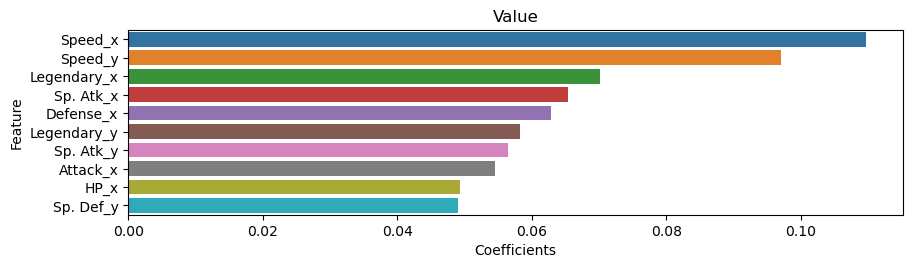

In [312]:
df = pd.DataFrame(X_train.columns)
df["importance"] = best.feature_importances_
df = df.sort_values("importance", ascending=False)
df = df[:10]
df

fig = plt.figure(figsize=(10, 2.4), dpi=100)
ax = fig.gca()

sns.barplot(x=df["importance"], y=df[0], ax=ax)

ax.set_xlabel("Coefficients")
ax.set_ylabel("Feature")
ax.set_title("Value")


plt.show()
plt.close()

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.



In [318]:
combats["Loser"] = combats.apply(lambda row: row["First_pokemon"] if row.Winner == row.Second_pokemon else row.Second_pokemon, axis=1)
combats.head()

,First_pokemon,Second_pokemon,Winner,Loser
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191
3,237,683,683,237
4,151,231,151,231


In [319]:
pokemon["defeats"] = pokemon.merge(combats, left_index=True, right_on="Loser").groupby("pid")["Name"].count()
pokemon["defeats"] = pokemon["defeats"].fillna(0)
pokemon["win_lose_ratio"] = pokemon.victories / pokemon.defeats

pokemon[["Name", "victories", "defeats", "win_lose_ratio"]].head()

,Name,victories,defeats,win_lose_ratio
0,Bulbasaur,0.0,0.0,NaN
1,Ivysaur,0.0,0.0,NaN
2,Venusaur,37.0,96.0,0.385417
3,Mega Venusaur,46.0,75.0,0.613333
4,Charmander,89.0,43.0,2.069767


In [324]:
pokemon = pokemon.dropna()
pokemon[["Name", "victories", "defeats", "win_lose_ratio"]].head()

,Name,victories,defeats,win_lose_ratio
2,Venusaur,37.0,96.0,0.385417
3,Mega Venusaur,46.0,75.0,0.613333
4,Charmander,89.0,43.0,2.069767
5,Charmeleon,70.0,55.0,1.272727
6,Charizard,55.0,57.0,0.964912


<Figure size 1200x900 with 0 Axes>

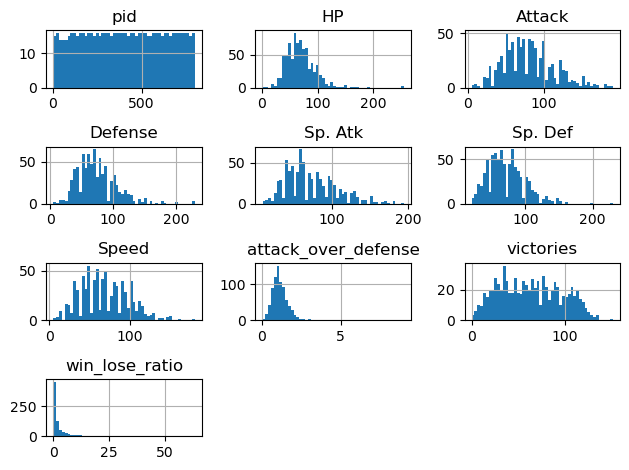

,pid,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,victories,win_lose_ratio
156,157,Articuno,90,85,100,95,125,85,True,0.850000,127.0,63.500000
514,515,Lickilicky,110,85,95,80,95,50,False,0.894737,116.0,38.666667
705,706,Thundurus Therian Forme,79,105,70,145,80,101,True,1.500000,121.0,30.250000
21,22,Pidgeotto,63,60,55,50,50,71,False,1.090909,115.0,28.750000
155,156,Snorlax,160,110,65,65,110,30,False,1.692308,136.0,27.200000
478,479,Honchkrow,100,125,52,105,52,71,False,2.403846,124.0,24.800000
728,729,Diggersby,85,56,77,50,77,78,False,0.727273,122.0,24.400000
718,719,Chespin,56,61,65,48,45,38,False,0.938462,118.0,23.600000
166,167,Chikorita,45,49,65,49,65,45,False,0.753846,119.0,19.833333
351,352,Wailord,170,90,45,90,45,60,False,2.000000,114.0,19.000000


In [331]:
interesting_columns = ['pid', 'Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'attack_over_defense', 'victories','win_lose_ratio']

plt.figure(dpi=150, figsize=(8, 6))
pokemon[interesting_columns].hist(bins=50)
plt.tight_layout()
plt.show()

pokemon.sort_values("win_lose_ratio", ascending=False)[interesting_columns].head(10)

**Comment:**

Some have high speed, some are legendary, some have high special attack, some have combinations, and so on. There is some correlation with the barplot on the first glance, but I will not perform more detailed analysis.

---


Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.
2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

**Comment:**

G squared will be a positive number if there pokemon i dominates pokemon j indirectly a.k.a. if there are pokemons k for which i is stronger than k and k is stronger than j. This works with the dominance hierarchy structure in a way that it adds to the more dominant pokemons more values (as G and G squared are summed). This is an informal explanation.

---


3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.

In [336]:
edges = []
for p1 in pokemon.index:
    for p2 in pokemon.index:
        if p1 == p2:
            continue
        p1_win = ((combats.Winner == p1) | (combats.Loser == p2)).astype(int).sum()
        p1_lose = ((combats.Winner == p2) | (combats.Loser == p1)).astype(int).sum()
        if p1_win > p1_lose:
            edges.append((pokemon.loc[p1], pokemon.loc[p2], 1))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/user72/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-336-2d24e5227c9e>", line 7, in <module>
    p1_lose = ((combats.Winner == p2) | (combats.Loser == p1)).astype(int).sum()
  File "/home/user72/.local/lib/python3.8/site-packages/pandas/core/ops/common.py", line 65, in new_method
    return method(self, other)
  File "/home/user72/.local/lib/python3.8/site-packages/pandas/core/arraylike.py", line 29, in __eq__
    return self._cmp_method(other, operator.eq)
  File "/home/user72/.local/lib/python3.8/site-packages/pandas/core/series.py", line 4939, in _cmp_method
    res_values = ops.comparison_op(lvalues, rvalues, op)
  File "/home/user72/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 250, in comparison_op
    res_values = _na_arithmetic_op(lvalues, rvalues, op, is_cmp=True)
  File "/home/user

TypeError: object of type 'NoneType' has no len()

In [ ]:
g = nx.DiGraph()
g.add_weighted_edges_from(edges)

pos = nx.spring_layout(g, k=2)
ec = nx.draw_networkx_edges(g, pos, alpha=0.01)
nc = nx.draw_networkx_nodes(g, pos, nodelist=g.nodes(), node_size=50, cmap=plt.cm.jet)
# plt.axis('off')
plt.show()

4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.